<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Sampling Error</font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.7</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this example, we take the full dataset containing the weight and height of 25000 adolescents and demonstrate the effect of variation due to sampling (or sampling error). To show the effect of sampling error, we assume that these 25000 observations represent the full population (i.e. all the adolescents from a town). With that in mind, we play the game that we do not have enough time and money to conduct a full survey of measuring the weight and height of the population. Instead, we randomly select 200 adolescents and measure the height and weight for these selected individuals creating a sample. The result is the sample dataset already used in Exercise 2.2. We will see that the population regression line and the sample regression line will not match. Moreover, to see the effect of sampling error, 10000 such random samples with 200 observations will be generated using the full dataset, then for each sample, a linear regression model will be fitted. Besically, we will carry out a Monte Carlo simulation. Finally, we introduce the concept of confidence and prediction intervals, respective the hypothesis testing. <br>
**Note**: *The original full dataset can be found at http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html containing 25000 observations. The sample dataset can be found at http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights representing the "Sample of 200 Individuals" dataset.*

### Table of contents
1. [Reading the data](#ReadingData)
2. [Population distribution and the population regression line](#PopDistributionPopRegrLine)
3. [Estimation variation due to sampling](#EstVarDueSampling)
4. [Confidence and prediction intervals](#ConfidPredInterval)
5. [Hypothesis testing and ANOVA](#HypoTestAnova)
6. [Using scikit-learn for linear regression](#scikit-LinearRegression)
7. [Which p-value can you expect?](#P-value)
8. [Using statsmodel and seaborn](#statsmodel-LinearRegression)

## 1. Reading the data <a name="ReadingData"></a>

Let's, import the required libraries and set inline drawing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, f_oneway
import os
%matplotlib inline

Read both the *HeightWeightSample.csv* and *HeightWeightSample.csv* files into pandas dataframes. The population dataset contains the weight (measured in pounds) of 25000 adolescents with a different height (measured in inches).

In [2]:
sample_data = pd.read_csv(os.path.join('data','HeightWeightSample.csv'))
population_data  = pd.read_csv(os.path.join('data','HeightWeight.csv'))

We will print out only the first 10 observations from the full dataset, which contains three columns: Index, Age, and Systolic blood pressure. 

In [3]:
print("Dataset of the weight vs. height:")
print("===============================================\n",population_data.head(10).to_string(index=False))
print(".....          .....           ....")

Dataset of the weight vs. height:
  Index  Height(Inches)  Weight(Pounds)
     1        65.78331        112.9925
     2        71.51521        136.4873
     3        69.39874        153.0269
     4        68.21660        142.3354
     5        67.78781        144.2971
     6        68.69784        123.3024
     7        69.80204        141.4947
     8        70.01472        136.4623
     9        67.90265        112.3723
    10        66.78236        120.6672
.....          .....           ....


Extract the input and output values from the pandas dataframes into vectors $\mathbf{x}_P$ and $\mathbf{y}_P$ for the population and vectors $\mathbf{x}_S$ and $\mathbf{y}_S$ for the sample. Also, extract the number of observations available in the datasets.

In [4]:
xp_=np.array(population_data["Height(Inches)"])[:,np.newaxis]
yp_=np.array(population_data["Weight(Pounds)"])[:,np.newaxis]
Np,_=population_data.shape
print("Number of members in the population =",Np)
xs_=np.array(sample_data["Height(Inches)"])[:,np.newaxis]
ys_=np.array(sample_data["Weight(Pounds)"])[:,np.newaxis]
Ns,_=sample_data.shape
print("Number of observations in the sample =",Ns)

Number of members in the population = 25000
Number of observations in the sample = 200


Before continuing our journey, let's define a class for the simple linear regression with attributes for storing the intercept $b$ and slope $w$ of the estimated regression line, as well as a *fit* method which calculates the model parameters and a *predict* method which predicts the value $\hat y$ based on the input.

**Note**: *As we will see in later examples this class definition resembles the linear regression class of scikit-learn library.*

In [5]:
class SimpleLinRegr:
    def __init__(self):
        self.w = 0.0    # Estimator for the slope
        self.b = 0.0    # Estimator for the intercept
    def fit(self,x_,y_):  # Method for fitting the regression line
        self.w=np.sum((y_-y_.mean())*(x_-x_.mean()))/np.sum((x_-x_.mean())**2)
        self.b=y_.mean()-self.w*x_.mean()
        return
    def predict(self,x_): # Method for prediction (can handle both scalar and vector)
        y_=self.w*x_+self.b
        return y_

## 2. Population distribution and the population regression line <a name="PopDistributionPopRegrLine"></a>

Before making the scatter plot, let's find out the attributes of the population, like the mean $\mu$ and standard deviation $\sigma$ of the population and the parameters $\beta_0$ and $\beta_1$ of the population regression line. We can use our newly defined class of *SimpleLinRegr*. 

In [6]:
poplinregr=SimpleLinRegr()
poplinregr.fit(xp_,yp_)
beta1=poplinregr.w
beta0=poplinregr.b
print("Population mean: %f, population standard deviation: %f"%(yp_.mean(),yp_.std()))
print('Population Regression Coefficients:')
print("Beta0=%f, Beta1=%f"%(beta0,beta1))

Population mean: 127.079421, population standard deviation: 11.660664
Population Regression Coefficients:
Beta0=-82.575743, Beta1=3.083476


Let's plot the distribution of the population (distribution of adolescent weight).

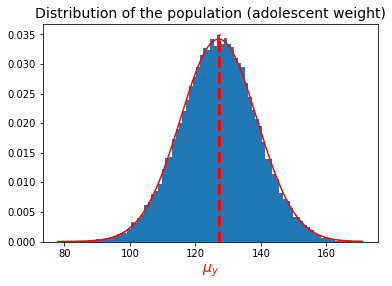

In [7]:
h=sorted(yp_)
fit = norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'r')
plt.hist(yp_, bins='auto', density=True)
plt.plot((np.mean(yp_),np.mean(yp_)),(0,0.035),'--r',lw=3)
plt.title("Distribution of the population (adolescent weight)",fontsize=14)
plt.xlabel('$\mu_y$',size=14,color='r')
plt.show()

As we expected, the distribution of the population mean resembles a normal (Gaussian) distribution. Make a scatterplot of the members of the population, together with the population regression line.

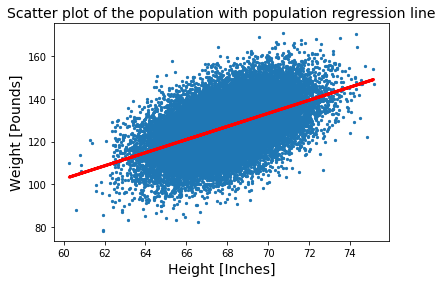

In [8]:
plt.scatter(xp_,yp_,s=5)
plt.plot(xp_,poplinregr.predict(xp_),'-r',lw=3)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Scatter plot of the population with population regression line",fontsize=14)
plt.show()

The observations are quite scattered, but due to the elliptical shape of the plot, we can assume that there is some linear relationship between the height and weight even without drawing the population regression line.

Of course, we can also calculate the correlation coefficient for the population to check if there is any correlation between the input and output.

In [9]:
rho=np.sum((xp_-xp_.mean())*(yp_-yp_.mean()))/(np.sqrt(np.sum((xp_-xp_.mean())**2))*np.sqrt(np.sum((yp_-yp_.mean())**2)))
print("Correlation coefficient between weight and height is:",rho)

Correlation coefficient between weight and height is: 0.502858520602844


In Ex. 2.4 we already draw the estimated regression line based on the sample for the population. It is the right time to check how close our previous estimate was to the "reality" (quotation mark used to signal that for the sake of our game the full dataset is seen as the population). For this reason, first, calculate again the estimated regression line using the newly defined python class. Then, draw both the estimated and the population regression line.

Point estimate of population mean = 127.22194999999999
Point estimate of population standard deviation = 11.960959176403788
Point estimate of beta1 = 3.4326761292716284
Point estimate of beta0 = -106.02770644878129


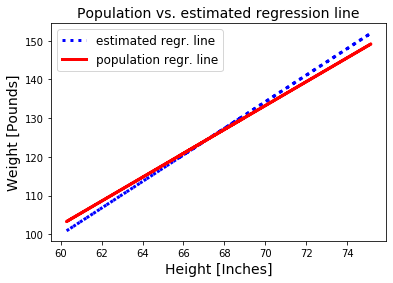

In [10]:
samplelinregr=SimpleLinRegr()
samplelinregr.fit(xs_,ys_)
line1,=plt.plot(xp_,samplelinregr.predict(xp_),':b',lw=3)
line2,=plt.plot(xp_,poplinregr.predict(xp_),'-r',lw=3)
print("Point estimate of population mean =", ys_.mean())
print("Point estimate of population standard deviation =", ys_.std(ddof=1))
print("Point estimate of beta1 =", samplelinregr.w)
print("Point estimate of beta0 =",samplelinregr.b)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Population vs. estimated regression line",fontsize=14)
plt.legend([line1, line2], ['estimated regr. line', 'population regr. line'],fontsize=12)
plt.show()

From the figure above, it is clear that the estimated regression line based on the sample is slightly different from the population regression line. This is called the sampling error.

The so-called point estimate $w$ and $b$ do not match the population attributes $\beta_1$ and $\beta_0$. If so, our predictions based on the estimated regression line will be also different from the conditional mean of the population. Predictions based on the estimated regression line for this specific sample will underestimate the average weight for small adolescents and overestimate the average weight for tall adolescents.

## 3. Estimation variation due to sampling <a name="EstVarDueSampling"></a>

Looking to the difference between the estimated and population regression line the natural question would arise: Will all samples provide point estimates for which weights will be underestimated for small adolescents and overestimate for tall adolescents?
Of course, not!

To see the effect of the different random samples, let's carry out a Monte Carlo simulation. First, we generate 10000 samples, each having 200 observations randomly chosen from the population. The purpose of this exercise is to show the variations in predictions due to sampling error. It is very unlikely that any two randomly generated samples contain the same observations because the number of different samples that can be created from a big population is almost infinite! For example, the number of different samples (each with 200 observation) which can be created from the population with only 25000 members is $\binom{N_p}{N_s}=\frac{N_p!}{ N_s!(N_p-N_s)!}=2.2\cdot 10^{504}$ (see https://www.mathsisfun.com/combinatorics/combinations-permutations-calculator.html).

In [11]:
s1_size=200   # sample size
s_nr=10000    # number of samples
# Select randomly 200 members from the population to create a sample and make this 10000 times
S1=np.random.choice(Np, (s1_size,s_nr))

Each sample represents a (column) vector with 200 elements, and there are 10000 samples created, placed one after the other, which forms a matrix. Thus, we should have 10000 columns, each containing a sample with 200 elements. We can check the size of the matrix created.

In [12]:
print(S1.shape)

(200, 10000)


Calculate the mean and standard deviation of each sample, which are point estimates for the mean and standard deviation of the population, and store the estimated values in a vector. Print out the min and max values to understand the range of values for sample mean and sample standard deviation.

In [13]:
ymean1_=[]
ystd1_=[]
print('Sample mean and sample standard deviation estimation with sample size if 200 (only every 1000th is printed):')
for i in range(s_nr):
    # Fit a regression line an every sample and store the point estimators
    ymean1_.append(yp_[S1[:,i]].mean())
    ystd1_.append(yp_[S1[:,i]].std(ddof=1))
    if (i+1)%1000==0:
        print("Sample %5d: y_mean=%3.3f, y_std=%3.3f"%(i+1,yp_[S1[:,i]].mean(),yp_[S1[:,i]].std(ddof=1)))
ymean1_=np.array(ymean1_)[:,np.newaxis]
ystd1_=np.array(ystd1_)[:,np.newaxis]
print("Sample means are ranged between: [%3.3f,  %3.3f]"%(ymean1_.min(),ymean1_.max()))
print("Sample standard deviations are ranged between: [%3.3f,  %3.3f]"%(ystd1_.min(),ystd1_.max()))

Sample mean and sample standard deviation estimation with sample size if 200 (only every 1000th is printed):
Sample  1000: y_mean=127.545, y_std=10.428
Sample  2000: y_mean=127.679, y_std=11.164
Sample  3000: y_mean=127.704, y_std=11.037
Sample  4000: y_mean=126.985, y_std=11.866
Sample  5000: y_mean=128.036, y_std=11.403
Sample  6000: y_mean=125.513, y_std=11.464
Sample  7000: y_mean=126.943, y_std=11.533
Sample  8000: y_mean=127.963, y_std=11.569
Sample  9000: y_mean=127.328, y_std=11.883
Sample 10000: y_mean=126.080, y_std=12.119
Sample means are ranged between: [123.785,  129.984]
Sample standard deviations are ranged between: [9.410,  13.688]


Let's, create another 10000 samples but with a much smaller sample size (only 20 observations per sample).

In [14]:
s2_size=20    # sample size changed to 20
# Select randomly 20 members from the population to create a sample with 20 observations and make this 10000 times
S2=np.random.choice(Np, (s2_size,s_nr))

Again, we have a matrix with 10000 columns, each column corresponding to a sample with size 20. Let's check the size of the matrix.

In [15]:
print(S2.shape)

(20, 10000)


Calculate the mean and standard deviation of each sample and store the estimated values in a vector. Print out the min and max values to understand the range of values for sample mean and sample standard deviation.

In [16]:
ymean2_=[]
ystd2_=[]
print('Sample mean and sample standard deviation estimation with sample size if 20 (only every 1000th is printed):')
for i in range(s_nr):
    # Fit a regression line an every sample and store the point estimators
    ymean2_.append(yp_[S2[:,i]].mean())
    ystd2_.append(yp_[S2[:,i]].std(ddof=1))
    if (i+1)%1000==0:
        print("Sample %5d: y_mean=%3.3f, y_std=%3.3f"%(i+1,yp_[S2[:,i]].mean(),yp_[S2[:,i]].std(ddof=1)))
ymean2_=np.array(ymean2_)[:,np.newaxis]
ystd2_=np.array(ystd2_)[:,np.newaxis]
print("Sample means are ranged between: [%3.3f,  %3.3f]"%(ymean2_.min(),ymean2_.max()))
print("Sample standard deviations are ranged between: [%3.3f,  %3.3f]"%(ystd2_.min(),ystd2_.max()))

Sample mean and sample standard deviation estimation with sample size if 20 (only every 1000th is printed):
Sample  1000: y_mean=127.800, y_std=11.182
Sample  2000: y_mean=128.140, y_std=11.231
Sample  3000: y_mean=127.832, y_std=10.446
Sample  4000: y_mean=125.688, y_std=10.054
Sample  5000: y_mean=123.903, y_std=10.940
Sample  6000: y_mean=127.678, y_std=12.561
Sample  7000: y_mean=125.483, y_std=8.187
Sample  8000: y_mean=126.183, y_std=7.473
Sample  9000: y_mean=124.876, y_std=12.907
Sample 10000: y_mean=129.795, y_std=12.472
Sample means are ranged between: [116.325,  138.012]
Sample standard deviations are ranged between: [5.472,  19.303]


We can observe that the range of values for sample mean and sample standard deviation are increasing as the sample size decreases.

To have a better understanding, let's check the distribution of the sample mean using the histogram plot and fitting a normal distribution on the histogram plot.

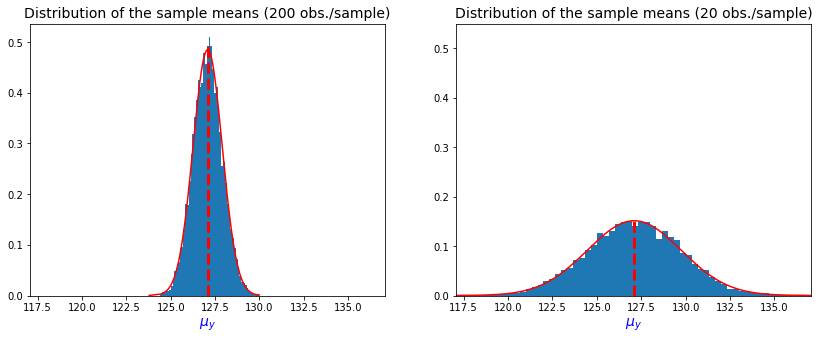

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
h=sorted(ymean1_)
fit = norm.pdf(h, np.mean(h), np.std(h))
ax[0].plot(h,fit,'r')
ax[0].hist(ymean1_, bins='auto', density=True)  # arguments are passed to np.histogram
ax[0].plot((np.mean(yp_),np.mean(yp_)),(0,0.5),'--r',lw=3)
ax[0].set_title("Distribution of the sample means (200 obs./sample)",fontsize=14)
ax[0].set_xlabel('$\mu_y$',size=14,color='b')
ax[0].set_xlim((yp_.mean()-10,yp_.mean()+10))
h=sorted(ymean2_)
fit = norm.pdf(h, np.mean(h), np.std(h))
ax[1].plot(h,fit,'r')
ax[1].hist(ymean2_, bins='auto', density=True)  # arguments are passed to np.histogram
ax[1].plot((np.mean(yp_),np.mean(yp_)),(0,0.15),'--r',lw=3)
ax[1].set_title("Distribution of the sample means (20 obs./sample)",fontsize=14)
ax[1].set_xlabel('$\mu_y$',size=14,color='b')
ax[1].set_xlim((yp_.mean()-10,yp_.mean()+10))
plt.ylim((0.0,0.55))
plt.show()

As we can observe, the sample mean has also a normal distribution, but depending on the sample size, the distribution has a larger or smaller variance. The smaller the sample size, the bigger the variance of the sample mean distribution.

Let's repeat this process but fit the estimated regression lines for each sample with size 200 and store the point estimates $w$ and $b$ in vectors.

In [18]:
linregr=SimpleLinRegr() # Create one simple linear regression instance for all 10000 samples 
w1_=[]    # Store the slope and intercept in lists
b1_=[]
print('Sample point estimates for Beta1 and Beta0 (only every 1000th is printed):')
for i in range(s_nr):
    # Fit a regression line an every sample and store the point estimators
    linregr.fit(xp_[S1[:,i]], yp_[S1[:,i]])
    w1_.append(linregr.w)
    b1_.append(linregr.b)
    if (i+1)%1000==0:
        print("Sample %5d: w=%2.2f b=%4.2f"%(i+1,linregr.w,linregr.b))
# Create vector of parameter estimators
w1_=np.squeeze(w1_)[:,np.newaxis]
b1_=np.squeeze(b1_)[:,np.newaxis]
print("The point estimates for Beta1 are spread in the interval =",(w1_.min(),w1_.max()))
print("The point estimates for Beta0 are spread in the interval =",(b1_.min(),b1_.max()))

Sample point estimates for Beta1 and Beta0 (only every 1000th is printed):
Sample  1000: w=2.43 b=-38.10
Sample  2000: w=3.05 b=-79.74
Sample  3000: w=2.98 b=-74.62
Sample  4000: w=3.24 b=-93.76
Sample  5000: w=3.27 b=-94.12
Sample  6000: w=3.30 b=-97.91
Sample  7000: w=3.15 b=-87.33
Sample  8000: w=2.98 b=-74.71
Sample  9000: w=3.00 b=-76.80
Sample 10000: w=3.23 b=-93.98
The point estimates for Beta1 are spread in the interval = (1.7155905403500145, 4.606853188463075)
The point estimates for Beta0 are spread in the interval = (-186.5235985665699, 9.005860020294378)


There is no surprise, that estimated regression line parameters are also varying from sample to sample in the same way as we observed for the sample mean.

Now, fit the estimated regression line for each sample with a size of 20 and store the point estimates $w$ and $b$ in vectors.

In [19]:
linregr=SimpleLinRegr() # Create one simple linear regression instance for all 10000 samples 
w2_=[]    # Store the slope and intercept in lists
b2_=[]
print('Sample point estimates (only every 1000th is printed):')
for i in range(s_nr):
    # Fit a regression line an every sample and store the point estimators
    linregr.fit(xp_[S2[:,i]], yp_[S2[:,i]])
    w2_.append(linregr.w)
    b2_.append(linregr.b)
    if (i+1)%1000==0:
        print("Sample %5d: w=%2.2f b=%4.2f"%(i+1,linregr.w,linregr.b))
# Create vector of parameter estimators
w2_=np.squeeze(w2_)[:,np.newaxis]
b2_=np.squeeze(b2_)[:,np.newaxis]
print("The point estimates for beta1 are spread in the interval =",(w2_.min(),w2_.max()))
print("The point estimates for beta0 are spread in the interval =",(b2_.min(),b2_.max()))

Sample point estimates (only every 1000th is printed):
Sample  1000: w=3.50 b=-109.65
Sample  2000: w=4.11 b=-152.26
Sample  3000: w=3.80 b=-130.97
Sample  4000: w=2.93 b=-74.22
Sample  5000: w=2.79 b=-65.94
Sample  6000: w=3.68 b=-121.93
Sample  7000: w=1.12 b=48.87
Sample  8000: w=1.23 b=42.72
Sample  9000: w=4.53 b=-182.25
Sample 10000: w=3.16 b=-87.88
The point estimates for beta1 are spread in the interval = (-2.6153853075612186, 8.500657182821964)
The point estimates for beta0 are spread in the interval = (-453.6646450425331, 302.8567096514666)


From the above is clear that the point estimate of the population regression parameters is varying with the sample, and for each sample, a different slope and intercept is estimated. We can observe that the point estimates are spread across a range (interval). Moreover, the range is wider if we decrease the sample size.

Let's, create the histogram for the intercept terms and fit a normal distribution on the histogram.

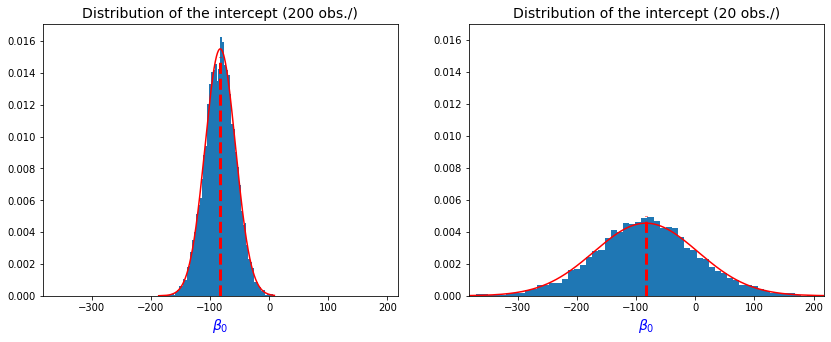

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
h=sorted(b1_)
fit = norm.pdf(h, np.mean(h), np.std(h))
ax[0].plot(h,fit,'r')
ax[0].hist(b1_, bins='auto', density=True)  # arguments are passed to np.histogram
ax[0].plot((beta0,beta0),(0,0.015),'--r',lw=3)
ax[0].set_title("Distribution of the intercept (200 obs./)",fontsize=14)
ax[0].set_xlabel('$\\beta_0$',size=14,color='b')
ax[0].set_xlim((b1_.mean()-300,b1_.mean()+300))
h=sorted(b2_)
fit = norm.pdf(h, np.mean(h), np.std(h))
ax[1].plot(h,fit,'r')
ax[1].hist(b2_, bins='auto', density=True)  # arguments are passed to np.histogram
ax[1].plot((beta0,beta0),(0,0.005),'--r',lw=3)
ax[1].set_title("Distribution of the intercept (20 obs./)",fontsize=14)
ax[1].set_xlabel('$\\beta_0$',size=14,color='b')
ax[1].set_xlim((b1_.mean()-300,b1_.mean()+300))
plt.ylim((0.0,0.017))
plt.show()

The intercept terms are also following a normal distribution with their mean equal to the population attribute $\beta_0$. The variance of the distribution is higher for the smaller sample size.

Let's, create the histogram for the slope terms and fit a normal distribution on the histograms.

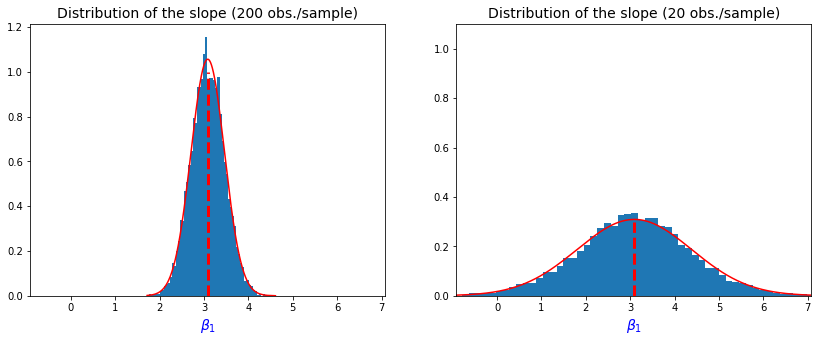

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
h=sorted(w1_)
fit = norm.pdf(h, np.mean(h), np.std(h))
ax[0].plot(h,fit,'r')
ax[0].hist(w1_, bins='auto', density=True)  # arguments are passed to np.histogram
ax[0].plot((beta1,beta1),(0,1.0),'--r',lw=3)
ax[0].set_title("Distribution of the slope (200 obs./sample)",fontsize=14)
ax[0].set_xlabel('$\\beta_1$',size=14,color='b')
ax[0].set_xlim((w1_.mean()-4,w1_.mean()+4))
h=sorted(w2_)
fit = norm.pdf(h, np.mean(h), np.std(h))
ax[1].plot(h,fit,'r')
ax[1].hist(w2_, bins='auto', density=True)  # arguments are passed to np.histogram
ax[1].plot((beta1,beta1),(0,0.3),'--r',lw=3)
ax[1].set_title("Distribution of the slope (20 obs./sample)",fontsize=14)
ax[1].set_xlabel('$\\beta_1$',size=14,color='b')
ax[1].set_xlim((w1_.mean()-4,w1_.mean()+4))
plt.ylim((0.0,1.1))
plt.show()

The slope terms also follow a normal distribution with their mean equal to the population attribute $\beta_1$. The variance of the distribution is higher for the smaller sample size.

Now, let's draw the population regression line and all 100000 estimated regression lines on the same plot for the two sample sizes. Also, make an annotation for where the mean of the input and output of the population is.

IntProgress(value=0, bar_style='info', description='Progress:')

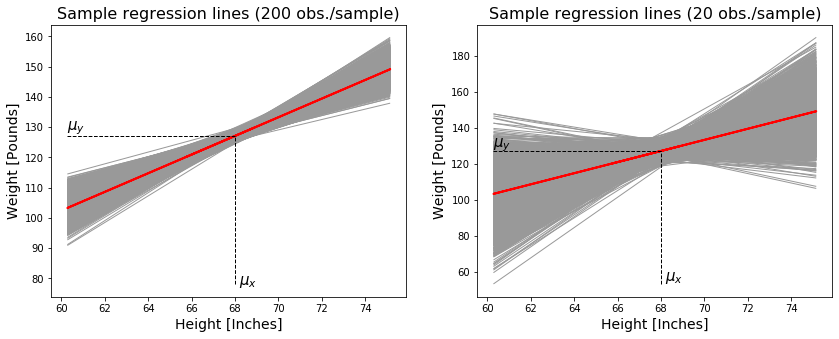

In [22]:
from ipywidgets import IntProgress
from IPython.display import display
from matplotlib.collections import LineCollection

# Instantiate the progress bar and display it
progress = IntProgress(min=0, max=100, description='Progress:',bar_style='info')
display(progress)

xmin=xp_.min()
xmax=xp_.max()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# Plot every estimated regression line in gray using matplotlib Linecollection
lines1=[]
lines2=[]
for i in range(s_nr):
    lines1.append(((xmin,w1_[i]*xmin+b1_[i]),(xmax,w1_[i]*xmax+b1_[i])))
    lines2.append(((xmin,w2_[i]*xmin+b2_[i]),(xmax,w2_[i]*xmax+b2_[i])))
    # Signaling to increment the progress bar
    if (i*100)%s_nr:
        progress.value=int(i/s_nr*100)
line1_coll = LineCollection(lines1, colors='0.6',linewidths=1)
ax[0].add_collection(line1_coll)
line2_coll = LineCollection(lines2, colors='0.6',linewidths=1)
ax[1].add_collection(line2_coll)
# Plot population regression line in red
ax[0].plot(xp_,beta1*xp_+beta0,'-r',lw=2)
ax[1].plot(xp_,beta1*xp_+beta0,'-r',lw=2)
# Draw the mean of the input and output of the population and annotate with text
ax[0].plot((np.mean(xp_),np.mean(xp_)),(np.min(yp_),np.mean(yp_)),'--k',lw=1)
ax[0].annotate('$\mu_x$', xy=(np.mean(xp_), np.mean(yp_)), xytext=(np.mean(xp_)+0.2, np.min(yp_)),size=15)
ax[0].plot((xmin,np.mean(xp_)),(np.mean(yp_),np.mean(yp_)),'--k',lw=1)
ax[0].annotate('$\mu_y$', xy=(np.mean(xp_), np.mean(yp_)), xytext=(np.min(xp_), np.mean(yp_)+2),size=15)
ax[0].set_xlabel("Height [Inches]",fontsize=14)
ax[0].set_ylabel("Weight [Pounds]",fontsize=14)
ax[0].set_title("Sample regression lines (200 obs./sample)",fontsize=16)
ax[1].plot((np.mean(xp_),np.mean(xp_)),(np.min(yp_)-25,np.mean(yp_)),'--k',lw=1)
ax[1].annotate('$\mu_x$', xy=(np.mean(xp_), np.mean(yp_)), xytext=(np.mean(xp_)+0.2, np.min(yp_)-23),size=15)
ax[1].plot((xmin,np.mean(xp_)),(np.mean(yp_),np.mean(yp_)),'--k',lw=1)
ax[1].annotate('$\mu_y$', xy=(np.mean(xp_), np.mean(yp_)), xytext=(np.min(xp_), np.mean(yp_)+2),size=15)
ax[1].set_xlabel("Height [Inches]",fontsize=14)
ax[1].set_ylabel("Weight [Pounds]",fontsize=14)
ax[1].set_title("Sample regression lines (20 obs./sample)",fontsize=16)
plt.show()

The red line represents the population regression line, which is the conditional mean of the population (the average value of the output for each given input). The population regression line passes through the population mean $\left \{ \overline x, \overline y \right \}$. As can be seen from the figure above, the estimated regression lines have a quite significant spreading around the population regression line. This spreading is not so significant around the mean of the population $\mu_x,\mu_y$, but as the independent variable moves away from the mean of the population, so increases the error of the prediction. This effect is called the sampling error or variation due to sampling. Moreover, the spreading is more significant when the sample size is decreased.

From all the above, we can conclude that, instead of the point estimates, we should rather create interval estimates. 

## 4. Confidence and prediction intervals <a name="ConfidPredInterval"></a>

We learned the lesson that instead of using the point estimate (i.e. providing a single value) for the population mean, we should rather provide an interval for the estimation of the population mean. But how we should construct the interval from a single sample? It is obvious, that the center of the interval should be the mean of that single sample, but theoretically, the interval would be between $-\infty,+\infty$ (the tail of the distribution goes to infinity). Thus, we shall construct an interval that can be used in practice with some confidence that in most cases the population mean will be included in this interval. 

In case the population mean and standard deviation is not known and need to be estimated from the sample, the Student t-distribution shall be used with $N-2$ degree of freedom. Let's, check the t-distribution for Ns-2=198 degree of freedom with zero mean and unit variance. For $N>30$ the t-distribution is very close to the normal distribution.

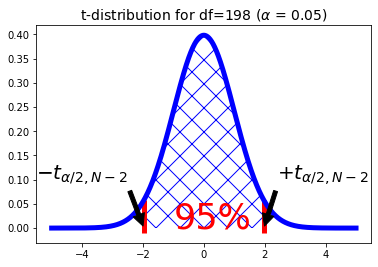

In [23]:
from scipy import stats
conflevel=95
alpha=1-conflevel/100
df = Ns-2
tscore = abs(stats.t.ppf(alpha/2, df))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,df), 'b', lw=5)
plt.vlines([-tscore, tscore], [-0.01,-0.01], stats.t.pdf(tscore,df), colors='r', lw=5)
hatching=np.arange(-tscore,+tscore,0.04)
for i in range(hatching.size-1):   # Hatching the 95% of the distribution
    pdf=stats.t.pdf(hatching[i],df)
    plt.fill_between([hatching[i],hatching[i+1]],[pdf,pdf], facecolor="none", hatch="X", edgecolor="b", linewidth=0.0)
plt.gcf().gca().annotate('$-t_{\\alpha/2,N-2}$', xy=(-tscore, 0.0), xytext=(-5.5, 0.10), \
                         arrowprops=dict(facecolor='black', shrink=0.05),size=20)
plt.gcf().gca().annotate('$+t_{\\alpha/2,N-2}$', xy=(tscore, 0.0), xytext=(2.4, 0.10), \
                         arrowprops=dict(facecolor='black', shrink=0.05),size=20)
plt.title("t-distribution for df=%d ($\\alpha$ = %1.2f)"%(df,alpha),fontsize=14)
plt.text(x=0-1,y=0,s=str(conflevel)+"%", size=35,color='r')
plt.show()

The sample mean has a t-distribution and the population mean is the center of this distribution. The probability that the sample mean will fall in the interval of $\left [ \mu - t_{\alpha/2,N-2},\mu + t_{\alpha/2,N-2} \right ]$ is $p=1-\alpha$.

In the figure above $\alpha=0.05$. Then considering the sample mean and sample standard deviation, we can construct a confidence interval: 

$\left [ \overline y - t_{\alpha/2,N-2}\cdot \frac{S_{y|x}}{\sqrt{N}},\overline y + t_{\alpha/2,N-2}\cdot \frac{S_{y|x}}{\sqrt{N}} \right ]$

where
- the sample mean $\overline y$ is an estimate for the population mean
- the sample standard deviation $S_{y|x}$ is the standard error of estimate and represents the estimate for the standard deviation of population conditional mean
- df = N-2 is the degrees of freedom 
- $100\cdot(1-\alpha)$ the confidence level

and we shall state that, in the long run, only 95 out of 100 confidence intervals will include the population mean.

Note: We should take into account that the smaller the sample size, the bigger the variation within it and vice versa. Because for a bigger size adding one more value does not add too much information, the standard error of estimate shall be divided by $\sqrt N$. For a mathematical proof check the book.

In [24]:
linregr.fit(xs_,ys_)  # fit again the estimated regression line on the loaded sample
yhat_=linregr.predict(xs_)
RSE=np.sqrt(np.sum((ys_-yhat_)**2)/(Ns-2))
print("Confidence interval for the population mean with 95% confidence level = [{0:3.3f}, {1:3.3f}]".\
      format(ys_.mean()-tscore*RSE/np.sqrt(Ns),ys_.mean()+tscore*RSE/np.sqrt(Ns)))

Confidence interval for the population mean with 95% confidence level = [125.833, 128.611]


To understand that, once the confidence interval is created there is no probability involved, let's check how many confidence intervals of the 10000 samples will contain the population mean.

**Note**: *You should run this code several times to observe that the output is 95% on average.*

In [25]:
s_size=200         # sample size
s_nr=10000         # number of samples

for c in range(10):
    # Select 200 members from the population randomly and make this 10000 times
    S=np.random.choice(Np, (s_size,s_nr))
    count=0            # counting how many conf. interval will include the conditional mean
    alpha=0.05         # confidence level
    df=s_size-2        # degree of freedom
    tscore = abs(stats.t.ppf(alpha/2, df))
    mu=yp_.mean()
    for i in range(s_nr):
        # Fitting the sample regression line for each sample
        x_=xp_[S[:,i]]
        y_=yp_[S[:,i]]
        linregr.fit(x_, y_)
        yhat_=linregr.predict(x_)
        # Calculating the standard error and the confidence interval for each sample
        RSE=np.sqrt(np.sum((y_-yhat_)**2)/(s_size-2))
        LCL=y_.mean()-tscore*RSE/np.sqrt(s_size)
        UCL=y_.mean()+tscore*RSE/np.sqrt(s_size)
        # Checking if the actual confidence interval includes the population conditional mean
        if LCL <= beta1*x_.mean()+beta0 and beta1*x_.mean()+beta0 <= UCL:
          count+=1
    print("Number of confidence intervals out of %d containing the population conditional mean is %d (%2.2f"\
          %(s_nr,count,count/s_nr*100), end='')
    print("%)")

Number of confidence intervals out of 10000 containing the population conditional mean is 9485 (94.85%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9512 (95.12%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9542 (95.42%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9480 (94.80%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9486 (94.86%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9534 (95.34%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9505 (95.05%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9509 (95.09%)
Number of confidence intervals out of 10000 containing the population conditional mean is 9496 (94.96%)
Number of confidence intervals out of 10000 containing the popul

As you can see, the number of the confidence interval is slightly above or below 95%. However, if you run the above code several times, you will observe that in the long run, the average is 95%. <br>
Let's, build up the confidence interval for the conditional mean and prediction interval for the individual prediction according to the formulas provided in the book:

In [26]:
xsord_=np.sort(xs_, axis=0,kind='mergesort')
conf_int_min_=linregr.predict(xsord_)-tscore*RSE*np.sqrt(1/Ns+(xsord_-xs_.mean())**2/np.sum((xsord_-xs_.mean())**2))
conf_int_max_=linregr.predict(xsord_)+tscore*RSE*np.sqrt(1/Ns+(xsord_-xs_.mean())**2/np.sum((xsord_-xs_.mean())**2))
pred_int_min_=linregr.predict(xsord_)-tscore*RSE*np.sqrt(1+1/Ns+(xsord_-xs_.mean())**2/np.sum((xsord_-xs_.mean())**2))
pred_int_max_=linregr.predict(xsord_)+tscore*RSE*np.sqrt(1+1/Ns+(xsord_-xs_.mean())**2/np.sum((xsord_-xs_.mean())**2))

Because this is an estimated conditional mean, the boundary of the confidence and prediction intervals are also depending on the value of $x$. Thus, to have a better understanding, let's create the plot for these intervals.

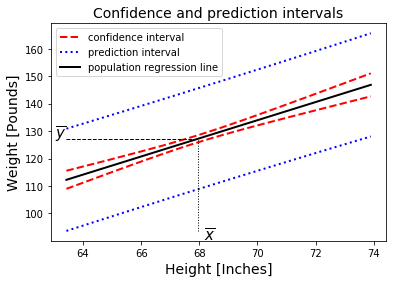

In [27]:
# Plot the confidence interval for the mean of yhat
line1,=plt.plot(xsord_,conf_int_min_,'--r',lw=2)
plt.plot(xsord_,conf_int_max_,'--r',lw=2)
# Plot the prediction interval for an individual yhat
line2,=plt.plot(xsord_,pred_int_min_,':b',lw=2)
plt.plot(xsord_,pred_int_max_,':b',lw=2)
# Plot population regression line in red
line3,=plt.plot(xsord_,linregr.predict(xsord_),'k',lw=2)
# Draw the mean of the input and output of the population and annotate with text
plt.plot([xsord_.mean(),xsord_.mean()],[pred_int_min_.min(),linregr.predict(xsord_.mean())],':k',lw=1)
plt.gcf().gca().annotate('$\overline{x}$', xy=(xsord_.mean(), linregr.predict(xsord_.mean())), \
                         xytext=(xsord_.mean()+0.2, pred_int_min_.min()-3.5),size=15)
plt.plot((xsord_.min(),xsord_.mean()),(linregr.predict(xsord_.mean()),linregr.predict(xsord_.mean())),'--k',lw=1)
plt.gcf().gca().annotate('$\overline{y}$', xy=(xsord_.min(), linregr.predict(xsord_.mean())), \
                         xytext=(xsord_.min()-0.4, linregr.predict(xsord_.mean())),size=15)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Confidence and prediction intervals",fontsize=14)
plt.legend([line1, line2, line3],['confidence interval','prediction interval','population regression line'],fontsize=10)
plt.show()

It can be observed that the confidence interval has a hyperbolic shape. The prediction interval also has a hyperbolic shape but the constant term of 1 under the square root is big enough to hinder the shape. That means, the further away the $x$ is from its mean, the wider the confidence and prediction intervals become. The confidence interval represents the interval in which the average output value (conditional mean) lies with a 95% confidence level. The prediction interval represents the interval in which the output of a single individual observation (and not the average) resides with a 95% confidence level. From the above figure, we can also conclude that the smallest uncertainty in our prediction is at the mean of the population.

Similarly, we can construct the confidence interval for the slope and intercept based on the formulas provided in the book.

In [28]:
S_b=RSE*np.sqrt(xs_.T@xs_/(Ns*np.sum((xs_-xs_.mean())**2)))
print("Confidence interval for beta0 with 95% confidence level = [{0:3.3f}, {1:3.3f}]".\
      format(float(samplelinregr.b-tscore*S_b),float(samplelinregr.b+tscore*S_b)))
S_w=RSE*np.sqrt(1/(Ns*np.sum((xs_-xs_.mean())**2)))
print("Confidence interval for beta1 with 95% confidence level = [{0:3.3f}, {1:3.3f}]".\
      format(float(samplelinregr.w-tscore*S_w),float(samplelinregr.w+tscore*S_w)))

Confidence interval for beta0 with 95% confidence level = [-151.563, -60.492]
Confidence interval for beta1 with 95% confidence level = [3.385, 3.480]


You may observe that the confidence interval for the intercept is quite wide, while for the slope is not. The reason is that the mean of the population is at a quite big distance from $x=0$, so even a small change in the slope will result in a big difference in the intercept term. This is again a good counter-example of why you should not try to provide a meaning for the intercept even though the intercept might make sense.

## 5. Hypothesis testing and ANOVA table <a name="HypoTestAnova"></a>

### t-test
We can test the hypothesis about the estimated coefficients. The most common hypothesis test involves testing the null hypothesis of "there is no relationship between $x$ and $y$" versus the alternative hypothesis of "there is some relationship between $x$ and $y$". Mathematically, this corresponds to testing:
- Null hypothesis ($H_0$): $\beta_1=0$
- Alternative hypothesis ($H_1$): $\beta_1\neq 0$

To test the null hypothesis, we need to determine whether $w$, our estimate for $\beta_1$, is sufficiently far from zero so that we can be confident that $\beta_1$ is non-zero. And how far should it be enough? That depends on the value of the standard error $S_w$. So we can create the t-statistic of $(w-0)/S_w$ and obtain the p-value from the survival function of the t-distribution. Similarly, we can build up a t-statistic of $(b-0)/S_b$ and obtain the corresponding p-value.

In [29]:
def OLSresults(x_,y_):
    pd.options.display.float_format = '{:,.3f}'.format
    linregr=SimpleLinRegr()
    linregr.fit(x_,y_)
    r_=y_-linregr.predict(x_)
    N,D=x_.shape
    MSE=r_.T@r_/(N-2)
    s_w=float(np.squeeze(np.sqrt(MSE/np.sum((x_-x_.mean())**2))))
    s_b=float(np.squeeze(s_w*np.sqrt(x_.T@x_/N)))
    table=pd.DataFrame(columns=["Input","Coefficient","Std. error","t-statistic","p-value","[0.025","0.975]"])
    t_stat=linregr.b/s_b
    pval = stats.t.sf(np.abs(t_stat),df)*2
    LCL=linregr.b-tscore*s_b
    UCL=linregr.b+tscore*s_b
    table=table.append({"Input":"Intercept","Coefficient":linregr.b,"Std. error":s_b,
                        "t-statistic":t_stat,"p-value":pval,"[0.025":LCL,"0.975]":UCL},ignore_index=True)
    t_stat=linregr.w/s_w
    pval = stats.t.sf(np.abs(t_stat),df)*2
    LCL=linregr.w-tscore*s_w
    UCL=linregr.w+tscore*s_w
    table=table.append({"Input":"Slope","Coefficient":linregr.w,
                        "Std. error":s_w,"t-statistic":t_stat,"p-value":pval,"[0.025":LCL,"0.975]":UCL},ignore_index=True)
    return table

print(OLSresults(xs_,ys_))

       Input  Coefficient  Std. error  t-statistic  p-value   [0.025  0.975]
0  Intercept     -106.028      24.735       -4.287    0.000 -154.805 -57.250
1      Slope        3.433       0.364        9.434    0.000    2.715   4.150


We can see that both the intercept and the slope are very far from the zero so that we can be confident that there is a relation between the $x$ and $y$.

### F-test
In general, an F-test in regression compares the fits of different linear models. Unlike t-tests that can assess only one regression coefficient at a time, the F-test can assess multiple coefficients simultaneously. Thus, as we will see, it can be used in multiple linear regression to test that all the coefficients are nonzero at the same time.

The F-test of the overall significance is a specific form of the F-test. It compares a model with no predictors to the model that you specify. A regression model that contains no predictors is also known as an intercept-only model.

The hypotheses for the F-test of the overall significance are as follows:

- Null hypothesis ($H_0$): The fit of the intercept-only model and your model are equal (i.e. $w=0$).
- Alternative hypothesis ($H_1$): The fit of the intercept-only model is significantly reduced compared to your model (i.e. $w\neq 0$).<br>
(In case of multiple linear regression the scalar $w$ will become a vector $\mathbf w$.)

If the p-value for the F-test of an overall significance test is less than your significance level, you can reject the null hypothesis and conclude that your model provides a better fit than the intercept-only model. The p-value can be obtained from the survival function of the F-distribution with $D=1$ and $N-2=198$ degree of freedom. The probability density function (PDF) of the F-distribution with $D$ and $N-2$ degree of freedom is shown below.

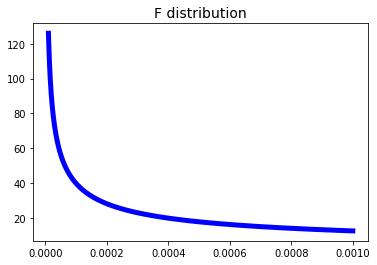

In [30]:
xs = np.linspace(0.00001,0.001,1000)
plt.plot(xs, stats.f.pdf(xs,1,198), 'b', lw=5)
plt.title("F distribution",fontsize=14)
plt.show()

Let's create the (1 way) ANOVA table - the analysis of variance. For this, we create the function.

In [31]:
def anova(x_,y_):
    slr=SimpleLinRegr()
    slr.fit(x_,y_)
    N=len(x_)
    D=1
    SSR=np.sum((slr.predict(x_)-y_.mean())**2)
    SSE=np.sum((y_-slr.predict(x_))**2)
    SST=np.sum((y_-y_.mean())**2)
    MSR=SSR/D
    MSE=SSE/(N-D-1)
    Fscore=MSR/MSE
    pvalue=stats.f.sf(Fscore,D,N-D-1)
    print("F-test and corresponding p-value:",Fscore,pvalue)
    if pvalue<=0.0001:
        stars='****'     # corresponding to at least 99.99%
    elif pvalue<=0.001: 
        stars='***'      # corresponding to at least 99.9%
    elif pvalue<=0.01: 
        stars='**'       # corresponding to at least 99%
    elif pvalue<=0.05:
        stars='*'        # corresponding to at least 95%
    else:
        stars=''         # corresponding to <95%
    print("===========================================================================")
    print("ANOVA (1 way) |  df  |     SS      |     MS      |  F test  |  p value")
    print("---------------------------------------------------------------------------")
    print(("Regression    | %3d  |  %9.3f  |  %9.3f  |  %6.3f  | %7.6f "+stars)%(D,SSR,MSR,Fscore,pvalue))
    print("Residuals     | %3d  |  %9.3f  |  %9.3f  |          |"%(Ns-D-1,SSE,MSE))
    print("Total         | %3d  |  %9.3f  |             |          |"%(Ns-1,SST))
    print("===========================================================================")
    return
anova(xs_,ys_)

F-test and corresponding p-value: 88.99742205570887 1.1029015151266247e-17
ANOVA (1 way) |  df  |     SS      |     MS      |  F test  |  p value
---------------------------------------------------------------------------
Regression    |   1  |   8828.451  |   8828.451  |  88.997  | 0.000000 ****
Residuals     | 198  |  19641.393  |     99.199  |          |
Total         | 199  |  28469.844  |             |          |


From the p-value, we can conclude that our model is significantly better than a model without a slope (i.e. a horizontal line corresponding to the population mean).

## 6. Using scikit-learn for linear regression <a name="scikit-LinearRegression"></a>

Now, that we have a good understanding of the linear regression, let's see how we can use scikit-learn library (https://scikit-learn.org/stable/index.html). The linear regression object is in the linear models of scikit-learn.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression

Create an instance of the LinearRegression class and fit the estimated regression line on the data.

In [33]:
sk_linregr=LinearRegression()
sk_linregr.fit(xs_,ys_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print out the slope and intercept as the point estimate of the population regression line:

In [34]:
print("Point estimates for the slope and intercept: (%f,%f)"%(sk_linregr.coef_[0][0],sk_linregr.intercept_[0]))

Point estimates for the slope and intercept: (3.432676,-106.027706)


Calculate the R-squared value with
- the 'score' method of the *LinearRegression* class
- with the 'r2_score' and
- with 'explained_variance_score' metrics

In [35]:
print("R-squared:",sk_linregr.score(xs_,ys_))
print("R-squared with r2_score metric =",r2_score(ys_, sk_linregr.predict(xs_)))
print("R-squared with explained variance score =",explained_variance_score(ys_, sk_linregr.predict(xs_)))

R-squared: 0.31009833265482645
R-squared with r2_score metric = 0.31009833265482645
R-squared with explained variance score = 0.31009833265482645


All three metrics provide the same result. Now, print out the mean squared error (scikit-learn calculates the biased MSE):

In [36]:
print("Biased MSE from scikit-learn =",mean_squared_error(ys_, sk_linregr.predict(xs_)))
print("Unbiased MSE using biased scikit-learn MSE is =",len(xs_)/(len(xs_)-2)*mean_squared_error(ys_, sk_linregr.predict(xs_)))

Biased MSE from scikit-learn = 98.20696539439301
Unbiased MSE using biased scikit-learn MSE is = 99.19895494383132


Calculate the F-score and corresponding p-value for ANOVA:

In [37]:
Fscore,pvalue=f_regression(xs_,np.ravel(ys_))
print("ANOVA F-score and p-value: (%f,%f)"%(Fscore[0],pvalue[0]))

ANOVA F-score and p-value: (88.997422,0.000000)


In the case of multiple linear regression, we can use this metric to check which features (inputs) are significant for a linear model and select only those. Because the 'height' input is significant, then we should keep in our model. As we can see, using scikit-learn is very easy, but because scikit-learn is a machine learning library and not a statistical library, its output is quite limited. 

## 7. Which p-value can you expect? <a name="P-value"></a>

#### Reference: *Improving your statistical inferences* by Daniel Lakens, Eindhoven University of Technology, Coursera

Now, let's play another game using Monte Carlo simulation. We know from the experience that the IQ of the human population has a normal distribution with mean 100 and standard deviation of 15. Now, let's see what p-value we can expect having a random sample based on the effect size and sample size?  In other words, which p-values can you expect to observe if there is a true effect, and you repeat the same study one-hundred thousand times?

The statistical power of the study is the probability that you will observe a significant effect if there is a true effect. 

The following code simulates one-sample t-tests. For the moment, we will set the mean IQ score in the simulated group to 106, which then will be compared to the average IQ score of all people (which is known to be 100). In other words, we randomly sample 100,000 samples from a normal distribution with mean 106 and a standard deviation of 15, then compute the t-score and the corresponding p-values.

**Note:** *The simulation will run about 10-20 seconds!*

Normalized number of p-values below alpha: 0.50051
Statistical power: 0.500464570207731
Cohen's d effect size: 0.4


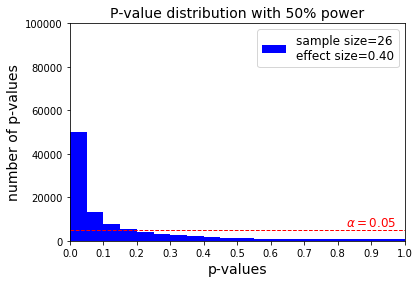

In [38]:
import statsmodels.stats.power as smp
from scipy.stats import ttest_1samp

# Set number of simulation (the higher the better results)
SimNr=100000

# Set the sample characteristics
M=106   # sample mean 
S=15    # sample standard deviation
N=26    # sample size

# Set-up an empty vector that holds all the simulated p-values
p = np.zeros(SimNr)

# Set up the number of bars that would you like to see in the histogram
bars=20

# Set the confidence level
alpha=0.05

# Run the Monte Carlo simulation
p_=np.array([ttest_1samp(np.random.normal(loc = M, scale= S, size = N), popmean=100)[1] for i in range(SimNr)])

# Check statistical power by summing significant p-values and dividing by number of simulations
print("Normalized number of p-values below alpha:",(sum(p_ < alpha)/SimNr))
# You can also use the statsmodels library for power calculation
pwr=smp.ttest_power((M-100)/S, nobs=N, alpha=alpha, alternative='two-sided')
print("Statistical power:",pwr)
# Calculate Cohen's d effect size
Cd=(M-100)/S
print("Cohen's d effect size:",Cd)

# Show the histogram
plt.hist(p_,bins=bars,facecolor='b',label="sample size="+str(N)+"\neffect size="+"%1.2f"%Cd)
plt.plot([0,1],[SimNr/bars,SimNr/bars], '--',c="r", lw=1)
plt.xlim(0,1)
plt.ylim(0,SimNr)
plt.title("P-value distribution with "+"%2.0f"%(100*pwr)+"% power",fontsize=14)
plt.xlabel("p-values",fontsize=14)
plt.ylabel("number of p-values",fontsize=14)
plt.legend(fontsize=12)
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.text(0.9,6666, r"$\alpha=0.05$", c='r',size=12, ha="center")
plt.show()

The histogram has 20 bins, that is, the probability [0,1] is divided into 20 intervals, and the left-most bin is corresponding to p-values <0.05.

Looking at the histogram above is clear that the statistical power is 50%, as half of the samples provide p<0.05. The type II error is also 50% because half of the samples provide p>00.5, although we know that the null hypothesis is true (there is a true effect, the mean of the sample set to 106 is different from the population mean 100). Thus, when the effect size is 6, and the sample size is 26, on average, 50% of the time will make an error by accepting the null hypothesis.

Now, increase the sample size to 51.

Normalized number of p-values below alpha: 0.80066
Statistical power: 0.7999244241018141
Cohen's d effect size: 0.4


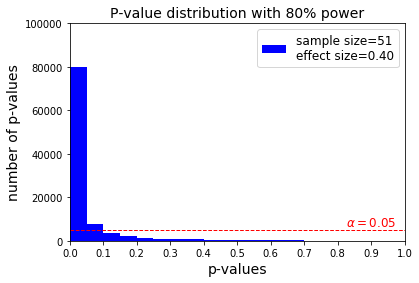

In [39]:
SimNr=100000
M=106   # sample mean
S=15    # sample standard deviation
N=51    # sample size

p = np.zeros(SimNr)
bars=20
alpha=0.05

# Run the Monte Carlo simulation
p_=np.array([ttest_1samp(np.random.normal(loc = M, scale= S, size = N), popmean=100)[1] for i in range(SimNr)])
print("Normalized number of p-values below alpha:",(sum(p_ < alpha)/SimNr))
pwr=smp.ttest_power((M-100)/S, nobs=N, alpha=alpha, alternative='two-sided')
print("Statistical power:",pwr)
Cd=(M-100)/S
print("Cohen's d effect size:",Cd)

# Show the histogram
plt.hist(p_,bins=bars,facecolor='b',label="sample size="+str(N)+"\neffect size="+"%1.2f"%Cd)
plt.plot([0,1],[SimNr/bars,SimNr/bars], '--',c="r", lw=1)
plt.xlim(0,1)
plt.ylim(0,SimNr)
plt.title("P-value distribution with "+"%2.0f"%(100*pwr)+"% power",fontsize=14)
plt.xlabel("p-values",fontsize=14)
plt.ylabel("number of p-values",fontsize=14)
plt.legend(fontsize=12)
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.text(0.9,6666, r"$\alpha=0.05$", c='r',size=12, ha="center")
plt.show()

At this time, 80% of the samples provide p<0.05, thus, the statistical power is 80%, while the Type II error is 20%. 

Now, instead of the sample size increase, let's change the effect size from 0.4 to 0.67.

Normalized number of p-values below alpha: 0.90366
Statistical power: 0.9042539845096635
Cohen's d effect size: 0.6666666666666666


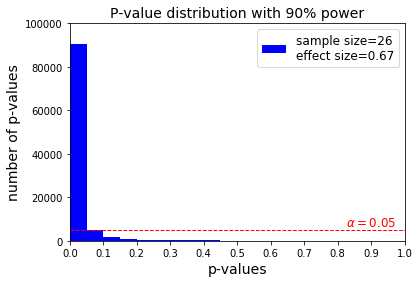

In [40]:
SimNr=100000
M=110   # sample mean
S=15    # sample standard deviation
N=26    # sample size

p = np.zeros(SimNr)
bars=20
alpha=0.05

# Run the Monte Carlo simulation
p_=np.array([ttest_1samp(np.random.normal(loc = M, scale= S, size = N), popmean=100)[1] for i in range(SimNr)])
print("Normalized number of p-values below alpha:",(sum(p_ < alpha)/SimNr))
pwr=smp.ttest_power((M-100)/S, nobs=N, alpha=alpha, alternative='two-sided')
print("Statistical power:",pwr)
Cd=(M-100)/S
print("Cohen's d effect size:",Cd)

# Show the histogram
plt.hist(p_,bins=bars,facecolor='b',label="sample size="+str(N)+"\neffect size="+"%1.2f"%Cd)
plt.plot([0,1],[SimNr/bars,SimNr/bars], '--',c="r", lw=1)
plt.xlim(0,1)
plt.ylim(0,SimNr)
plt.title("P-value distribution with "+"%2.0f"%(100*pwr)+"% power",fontsize=14)
plt.xlabel("p-values",fontsize=14)
plt.ylabel("number of p-values",fontsize=14)
plt.legend(fontsize=12)
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.text(0.9,6666, r"$\alpha=0.05$", c='r',size=12, ha="center")
plt.show()

Now, the statistical power increased to 90%, reducing the type II error rate to 10%. We can conclude that the higher the statistical power the steeper the p-value distribution becomes (more p-values fall in the left-most bin corresponding to the interval [0.0,0.05].

Now, let's see what happens if there is no true effect (we set in the simulation the sample group to have IQ score 100, that is all 100,000 samples will be sampled from a normal distribution with mean 100).

Normalized number of p-values below alpha: 0.04891
Statistical power: 0.0500000002618293
Cohen's d effect size: 0.0


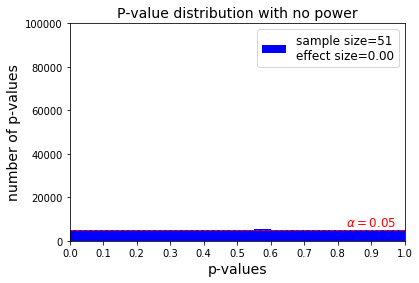

In [41]:
SimNr=100000
M=100   # sample mean
S=15    # sample standard deviation
N=51    # sample size

p = np.zeros(SimNr)
bars=20
alpha=0.05

# Run the Monte Carlo simulation
p_=np.array([ttest_1samp(np.random.normal(loc = M, scale= S, size = N), popmean=100)[1] for i in range(SimNr)])
print("Normalized number of p-values below alpha:",(sum(p_ < alpha)/SimNr))
pwr=smp.ttest_power((M-100)/S, nobs=N, alpha=alpha, alternative='two-sided')
print("Statistical power:",pwr)
Cd=(M-100)/S
print("Cohen's d effect size:",Cd)

# Show the histogram
plt.hist(p_,bins=bars,facecolor='b',label="sample size="+str(N)+"\neffect size="+"%1.2f"%Cd)
plt.plot([0,1],[SimNr/bars,SimNr/bars], '--',c="r", lw=1)
plt.xlim(0,1)
plt.ylim(0,SimNr)
plt.title("P-value distribution with no power",fontsize=14)
plt.xlabel("p-values",fontsize=14)
plt.ylabel("number of p-values",fontsize=14)
plt.legend(fontsize=12)
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.text(0.9,6666, r"$\alpha=0.05$", c='r',size=12, ha="center")
plt.show()

When the means are equal (i.e., the null hypothesis is true), the p-values are uniformly distributed, and each bin in the above histogram will contain 5% of all the p-values.

Next, let's see what happens if we decide to further decrease the type II error and increase the statistical power beyond 90%. We should limit both the x-axis and y-axis, which practically means that we will zoom in the bottom left part of the histogram. Moreover, at this time, we will use 100 bins.  

Normalized number of p-values below alpha: 0.98774
Statistical power: 0.9874950963338852
Cohen's d effect size: 0.6


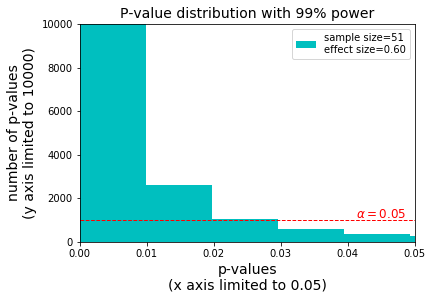

In [42]:
SimNr=100000
M=109   # sample mean
S=15    # sample standard deviation
N=51    # sample size

p = np.zeros(SimNr)
bars=100
alpha=0.05
np.random.seed(36)

# Run the Monte Carlo simulation
p_=np.array([ttest_1samp(np.random.normal(loc = M, scale= S, size = N), popmean=100)[1] for i in range(SimNr)])
print("Normalized number of p-values below alpha:",(sum(p_ < alpha)/SimNr))
pwr=smp.ttest_power((M-100)/S, nobs=N, alpha=alpha, alternative='two-sided')
print("Statistical power:",pwr)
Cd=(M-100)/S
print("Cohen's d effect size:",Cd)

# Show the histogram
plt.hist(p_,bins=bars,facecolor='c',label="sample size="+str(N)+"\neffect size="+"%1.2f"%Cd)
plt.plot([0,1],[SimNr/bars,SimNr/bars], '--',c="r", lw=1)
plt.xlim(0,0.05)
plt.ylim(0,SimNr/10)
plt.title("P-value distribution with "+"%2.0f"%(100*pwr)+"% power",fontsize=14)
plt.xlabel("p-values\n(x axis limited to 0.05)",fontsize=14)
plt.ylabel("number of p-values\n(y axis limited to 10000)",fontsize=14)
plt.legend()
plt.text(0.045,1100, r"$\alpha=0.05$", c='r',size=12, ha="center")
plt.show()

The statistical power is 99%, so the type II error is only 1%. However, the probability of having p-values between 0.03 and 0.05 is less than with the uniform distribution, i.e., when there is no true effect. Now ask yourself, when you have very high power, and you observe a p-value between 0.04 and 0.05, which is more likely, that the null-hypothesis is true, or that the alternative hypothesis is true?

## 8. Using statsmodel and seaborn <a name="statsmodel-LinearRegression"></a>

### Statsmodel library
A complete statistical output can be generated using *statsmodels* package (https://www.statsmodels.org). If one knows the R language then the *statsmodels* should be familiar. When printing out the summary of the OLS one will find out:
1. In the upper part: the name of the dependent variable, the number of observations, degrees of freedom, R-squared value, F-statistics with its p-value (the rest like Adj. R-square, Log-likelihood, AIC/BIC should not concern at this moment);
2. In the middle part: the coefficient of the regression with its standard error, confidence interval and the corresponding t-statistic with its p-value (which is exactly the table generated by our "OLSresults" function);
3. In the lower part: different statistics, some of them are familiar from the Exercise of 2.5, like Durbin-Watson for uncorrelated errors, and Jarque-Bera with Skew and Kurtosis for normality test (Omnibus is another statistic for normality test).

In [43]:
from statsmodels.formula.api import ols
sample_data=sample_data.rename(index=str, columns={"Height(Inches)": "Height","Weight(Pounds)":"Weight"})
model = ols(formula = 'Weight ~ Height', data=sample_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     89.00
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.10e-17
Time:                        10:16:20   Log-Likelihood:                -742.50
No. Observations:                 200   AIC:                             1489.
Df Residuals:                     198   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -106.0277     24.735     -4.287      0.0

One can also print out the one-way ANOVA table using statsmodels.

In [44]:
import statsmodels.api as sm
table = sm.stats.anova_lm(model, typ=1)
print(table)

              df     sum_sq   mean_sq      F  PR(>F)
Height     1.000  8,828.451 8,828.451 88.997   0.000
Residual 198.000 19,641.393    99.199    nan     nan


To our satisfaction, the results of the stats library are matching our results obtained with "OLSresults" and "anova" function.

Next, we can make plots of the statistical power for a one-sample t-test as a function of effect size (Cohen's d), the number of observations, and significance level $\alpha$.

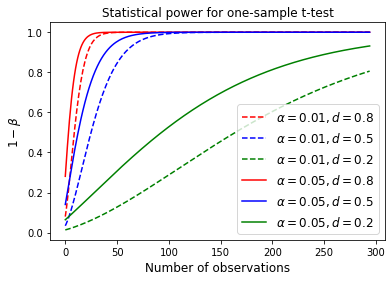

In [45]:
from statsmodels.stats.power import TTestPower
# parameters for power analysis
effect_sizes = np.array([0.2, 0.5, 0.8])
alpha=np.array([0.01,0.05])
sample_sizes = np.array(range(5, 300))
# calculate power curves from multiple power analyses
analysis=TTestPower()
plt.plot(analysis.power(effect_size=effect_sizes[2],nobs=sample_sizes,alpha=alpha[0]),'r--',label='$\\alpha=0.01,d=0.8$')
plt.plot(analysis.power(effect_size=effect_sizes[1],nobs=sample_sizes,alpha=alpha[0]),'b--',label='$\\alpha=0.01,d=0.5$')
plt.plot(analysis.power(effect_size=effect_sizes[0],nobs=sample_sizes,alpha=alpha[0]),'g--',label='$\\alpha=0.01,d=0.2$')
plt.plot(analysis.power(effect_size=effect_sizes[2],nobs=sample_sizes,alpha=alpha[1]),'r',label='$\\alpha=0.05,d=0.8$')
plt.plot(analysis.power(effect_size=effect_sizes[1],nobs=sample_sizes,alpha=alpha[1]),'b',label='$\\alpha=0.05,d=0.5$')
plt.plot(analysis.power(effect_size=effect_sizes[0],nobs=sample_sizes,alpha=alpha[1]),'g',label='$\\alpha=0.05,d=0.2$')
plt.legend(fontsize=12)
plt.xlabel('Number of observations',fontsize=12)
plt.ylabel('$1-\\beta$',fontsize=12)
plt.title('Statistical power for one-sample t-test',fontsize=12)
plt.show()

### Seaborn library
Using seaborn, the statistical data visualization library (https://seaborn.pydata.org/), one can make fancy plots of the simple linear regression. Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.
For example, with a single line of code, we can have a scatter plot of the observations and the plot of the estimated regression line together with a 95% confidence interval.

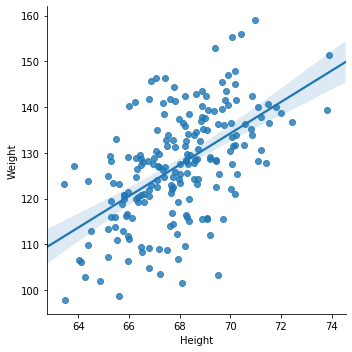

In [46]:
import seaborn as sns
sns.lmplot(x="Height", y="Weight", data=sample_data,ci=95)
plt.show()

We can see the hyperbolic shape of the confidence interval. The confidence interval is very narrow at the mean of the observations.

<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).